In [113]:
import pandas as pd
import numpy as np
import re
import math
data = pd.read_csv('anime.csv')


numerator = data['Completed']
denominator = data['Completed'] + data['Watching'] + data['On-Hold'] + data['Dropped']
completed_ratio=numerator/denominator
suma=0
for i in range(len(completed_ratio)):
    if completed_ratio[i]=='Unknown':
        continue
    elif completed_ratio[i]<0.25:
        completed_ratio[i]='Very low'
    elif completed_ratio[i] <0.5:
        completed_ratio[i]='Low'
    elif completed_ratio[i]<0.75:
        completed_ratio[i]='Medium'
    elif completed_ratio[i]<1:
        completed_ratio[i]='High'
    else:
        suma+=1
print(suma)
print(completed_ratio)
        
data = data.drop(columns=[col for col in data if col in ['Completed', 'Watching', 'On-Hold', 'Dropped']])
data['completed_ratio']=completed_ratio
#Removing columns 'Name','English name','Japanese name' because they are directly related to 'MAL_ID'
data = data.drop(columns=['Name','English name','Japanese name'])

#Removing animes with only one episode so that we focus only on series (not sure if we want to focus only on series but might be easier)
data = data[data.Episodes != str(1)]

#Removing animes that last less than 1 min per episode
data = data[data['Duration'].str.contains("sec") == False ]

#Replacing string values in Duration by an int (minutes per episode)
def containsNumber(value):
    if True in [char.isdigit() for char in value]:
        return True
    return False

for i in range(data.Duration.size):
    if containsNumber(data.iloc[i,11]) :
        data.iloc[i,11]=int(re.search(r'\d+', data.iloc[i,11]).group())
        
data = data.replace("Unknown", np.nan)

data["Score"] = pd.to_numeric(data["Score"])
data["Score-10"] = pd.to_numeric(data["Score-10"])
data["Score-9"] = pd.to_numeric(data["Score-9"])
data["Score-8"] = pd.to_numeric(data["Score-8"])
data["Score-7"] = pd.to_numeric(data["Score-7"])
data["Score-6"] = pd.to_numeric(data["Score-6"])
data["Score-5"] = pd.to_numeric(data["Score-5"])
data["Score-4"] = pd.to_numeric(data["Score-4"])
data["Score-3"] = pd.to_numeric(data["Score-3"])
data["Score-2"] = pd.to_numeric(data["Score-2"])
data["Score-1"] = pd.to_numeric(data["Score-1"])
data["Episodes"] = pd.to_numeric(data["Episodes"])
data["Duration"] = pd.to_numeric(data["Duration"])
data["Ranked"] = pd.to_numeric(data["Ranked"])

cat_col=data.select_dtypes(include=['object']).columns.tolist()
num_col=data.select_dtypes(exclude=['object']).columns.tolist()

data = data[data['completed_ratio'].notna()]

                            
dataNoNA = data.dropna(axis=0)
dataWNA = pd.concat([data,dataNoNA]).drop_duplicates(keep=False)

cat_col=dataNoNA.select_dtypes(include=['object']).columns.tolist()
num_col=dataNoNA.select_dtypes(exclude=['object']).columns.tolist()

dataNoNA = dataNoNA.sample(n=950,random_state=0)
dataWNA = dataWNA.sample(n=50,random_state=0)

data_cat=dataWNA[cat_col]
data_num=dataWNA[num_col]
data_num.fillna(data_num.median(),inplace=True)
data_cat.fillna(data_cat.mode().iloc[0],inplace=True)


data_final=pd.concat([data_num, data_cat], axis=1)
data_final=pd.concat([dataNoNA, data_final], axis=0)


data_Y=data_final['completed_ratio']

data_final=data_final.loc[:, data_final.columns != 'completed_ratio']
print(data_final.shape)
print(data_Y.shape)



260
0            High
1            High
2            High
3            High
4          Medium
           ...   
17557         NaN
17558    Very low
17559    Very low
17560    Very low
17561    Very low
Length: 17562, dtype: object
(1000, 28)
(1000,)


C:\Users\katol\AppData\Roaming\Python\Python39\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [103]:
myset={}
for i in range(data_final.Genres.size):
    coma=data_final.iloc[[i]]['Genres'].item().split(", ")
    for elem in coma:
        myset['genre_' + elem]=1
for cat in myset.keys():
    data_final[cat]=0
for i in range(data_final.Genres.size):
    for key in data_final.iloc[[i]]['Genres'].item().split(", "):
        key = 'genre_' + key
        data_final.at[data_final.index[i],key]=1.0
data_final = data_final.drop(columns=['Genres'])
#display(data_final)

In [104]:
myset={}
for i in range(data_final.Licensors.size):
    coma=data_final.iloc[[i]]['Licensors'].item().split(", ")
    for elem in coma:
        myset['licensor_' + elem]=1
for cat in myset.keys():
    data_final[cat]=0
for i in range(data_final.Licensors.size):
    for key in data_final.iloc[[i]]['Licensors'].item().split(", "):
        data_final.at[data_final.index[i],'licensor_' + key]=1.0
data_final = data_final.drop(columns=['Licensors', 'licensor_Inc.'])
display(data_final)


,MAL_ID,Score,Type,Episodes,Aired,Premiered,Producers,Studios,Source,Duration,...,licensor_DiC Entertainment,licensor_Enoki Films,licensor_Cookie Jar Entertainment,licensor_Voyager Entertainment,licensor_Hasbro,licensor_Nelvana,licensor_Urban Vision,licensor_Geneon Universal Entertainment,licensor_NBCUniversal Entertainment Japan,licensor_Critical Mass Video
1948,2129,7.360,TV,13.0,"Jan 6, 2008 to Mar 30, 2008",Winter 2008,"Bandai Visual, Lantis",P.A. Works,Original,24.0,...,0,0,0,0,0,0,0,0,0,0
4104,5355,7.390,TV,12.0,"Apr 2, 2009 to Jun 18, 2009",Spring 2009,"Dentsu, Shochiku, Mainichi Broadcasting System...",Production I.G,Game,23.0,...,0,0,0,0,0,0,0,0,0,0
371,395,7.080,TV,13.0,"Aug 26, 2004 to Nov 18, 2004",Summer 2004,Fuji TV,Gonzo,Manga,23.0,...,0,0,0,0,0,0,0,0,0,0
8022,19163,7.240,TV,10.0,"Apr 12, 2014 to Jun 14, 2014",Spring 2014,"Kadokawa Shoten, AT-X, Nippon Columbia",Production IMS,Light novel,24.0,...,0,0,0,0,0,0,0,0,0,0
15656,39527,4.690,TV,12.0,"Jul 31, 2019 to Oct 16, 2019",Summer 2019,Nippon Television Network,"Gonzo, Seven",Manga,22.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,42224,6.390,OVA,12.0,"Aug 28, 2020 to ?",Fall 1976,Sanrio,Madhouse,Manga,19.0,...,0,0,0,0,0,0,0,0,0,0
16053,40256,6.470,ONA,12.0,"Aug 15, 2019",Fall 1976,Netflix,"Satelight, Yumeta Company",Other,24.0,...,0,0,0,0,0,0,0,0,0,0
5997,9955,6.475,TV,52.0,2007 to 2008,Fall 1976,Sanrio,Madhouse,Manga,11.0,...,0,0,0,0,0,0,0,0,0,0
9279,25083,6.475,Special,2.0,"Jun, 2001",Fall 1976,Bandai Visual,Nippon Animation,Manga,45.0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
myset={}
for i in range(data_final.Producers.size):
    coma=data_final.iloc[[i]]['Producers'].item().split(", ")
    for elem in coma:
        myset['producer_' + elem]=1
for cat in myset.keys():
    data_final[cat]=0
for i in range(data_final.Producers.size):
    for key in data_final.iloc[[i]]['Producers'].item().split(", "):
        data_final.at[data_final.index[i],'producer_' + key]=1.0
data_final = data_final.drop(columns=['Producers'])


C:\Users\katol\AppData\Local\Temp\ipykernel_3100\451234071.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_final[cat]=0


In [106]:
for i in range(data_final.Duration.size):
    data_final.iloc[i,5]=int(re.search(r'\d+', data_final.iloc[i,5]).group())
    date=[int(s) for s in data_final.iloc[i,4].split() if s.isdigit()]
    data_final.iloc[i,4]=date[-1]

data_final = data_final.drop(columns=['MAL_ID'])

In [107]:
#TODO
from sklearn.preprocessing import OneHotEncoder

cat_col_final=data_final.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(data_final[cat_col_final])
df_one = pd.DataFrame(encoder.transform(data_final[cat_col_final]))
df_one.index=data_final.index
#print(data_final[cat_col_final].columns)
column_name = encoder.get_feature_names(data_final[cat_col_final].columns)
#display(data_final)
df_one = df_one.set_axis(column_name, axis=1)
#df_one=pd.DataFrame(df_one, columns= column_name)
display(df_one)

C:\Users\katol\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Type_ONA,Type_OVA,Type_Special,Type_TV,Aired_1966,Aired_1968,Aired_1969,Aired_1971,Aired_1972,Aired_1973,...,Source_Other,Source_Radio,Source_Visual novel,Source_Web manga,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Rx - Hentai
1948,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8022,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15656,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16053,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9279,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [108]:
from sklearn.preprocessing import MinMaxScaler

num_col_final=data_final.select_dtypes(exclude=['object']).columns.tolist()

encoder2 = MinMaxScaler()
encoder2.fit(data_final[num_col_final])
df_scale = pd.DataFrame(encoder2.fit_transform(data_final[num_col_final]))
df_scale.index=data_final.index
df_scale.columns=data_final[num_col_final].columns
display(df_scale)

,Score,Episodes,Duration,Ranked,Popularity,Members,Favorites,Plan to Watch,Score-10,Score-9,...,producer_Milky Animation Label,producer_Discovery,producer_Queen Bee,producer_PoRO,producer_AC Create,producer_Y.O.U.C,producer_Magic Bus,producer_Walt Disney Studios,producer_Tsuchida Productions,producer_Netflix
1948,0.747475,0.030220,0.469388,0.132137,0.047613,0.071032,0.006244,0.140711,0.011964,0.024618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4104,0.751804,0.027473,0.448980,0.122304,0.062214,0.053783,0.007309,0.111327,0.008217,0.014485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,0.707071,0.030220,0.448980,0.208577,0.064208,0.052411,0.003126,0.051560,0.011909,0.020405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8022,0.730159,0.021978,0.469388,0.164298,0.016946,0.171986,0.020424,0.122086,0.045787,0.060000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15656,0.362193,0.027473,0.428571,0.687579,0.244459,0.005741,0.000202,0.016085,0.000163,0.000095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,0.607504,0.027473,0.367347,0.447919,0.474493,0.001014,0.000081,0.001368,0.000194,0.000099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16053,0.619048,0.027473,0.469388,0.384357,0.190395,0.009844,0.000445,0.013814,0.000730,0.001233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5997,0.619769,0.137363,0.204082,0.871860,0.870412,0.000048,0.000000,0.000089,0.000004,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9279,0.619769,0.000000,0.897959,1.000000,0.740882,0.000129,0.000000,0.000329,0.000016,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
dfscaleone=pd.concat([df_scale, df_one], axis=1)

In [110]:
from sklearn.feature_selection import VarianceThreshold
#constant
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(dfscaleone)

print(len(dfscaleone.columns[constant_filter.get_support()]))

constant_columns = [column for column in dfscaleone.columns
                    if column not in dfscaleone.columns[constant_filter.get_support()]]

dfscaleone.drop(labels=constant_columns, axis=1, inplace=True)

#quasiconstant
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(dfscaleone)

print(len(dfscaleone.columns[qconstant_filter.get_support()]))
qconstant_columns = [column for column in dfscaleone.columns
                    if column not in dfscaleone.columns[qconstant_filter.get_support()]]

dfscaleone.drop(labels=qconstant_columns, axis=1, inplace=True)

print(len(qconstant_columns))

940
231
709


,Score,Ranked,Popularity,Members,Plan to Watch,Score-8,Score-7,genre_Drama,genre_Romance,genre_School,...,Source_Novel,Source_Original,Source_Other,Source_Visual novel,Source_Web manga,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity
1948,0.747475,0.132137,0.047613,0.071032,0.140711,0.052107,0.078173,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4104,0.751804,0.122304,0.062214,0.053783,0.111327,0.033025,0.054728,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
371,0.707071,0.208577,0.064208,0.052411,0.051560,0.040652,0.072298,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8022,0.730159,0.164298,0.016946,0.171986,0.122086,0.138189,0.254924,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15656,0.362193,0.687579,0.244459,0.005741,0.016085,0.000364,0.001244,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,0.607504,0.447919,0.474493,0.001014,0.001368,0.000322,0.000632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16053,0.619048,0.384357,0.190395,0.009844,0.013814,0.004019,0.012310,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5997,0.619769,0.871860,0.870412,0.000048,0.000089,0.000004,0.000020,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9279,0.619769,1.000000,0.740882,0.000129,0.000329,0.000020,0.000046,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


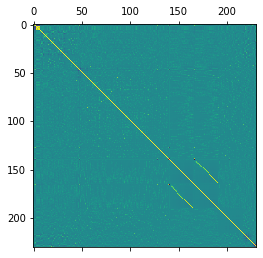

{'Score-8', 'Premiered_2015', 'Plan to Watch', 'Premiered_2016', 'Premiered_2019', 'Premiered_2014', 'Premiered_2017', 'Premiered_2012', 'Premiered_2013', 'Score-7', 'Premiered_2020', 'Premiered_1976', 'Premiered_2018', 'Ranked'}


,Score,Popularity,Members,genre_Drama,genre_Romance,genre_School,genre_Action,genre_Historical,genre_Martial Arts,genre_Samurai,...,Source_Novel,Source_Original,Source_Other,Source_Visual novel,Source_Web manga,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity
1948,0.747475,0.047613,0.071032,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4104,0.751804,0.062214,0.053783,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
371,0.707071,0.064208,0.052411,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8022,0.730159,0.016946,0.171986,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15656,0.362193,0.244459,0.005741,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,0.607504,0.474493,0.001014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16053,0.619048,0.190395,0.009844,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5997,0.619769,0.870412,0.000048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9279,0.619769,0.740882,0.000129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


1948         High
4104         High
371          High
8022         High
15656         Low
           ...   
16888    Very low
16053        High
5997       Medium
9279       Medium
5144         High
Name: completed_ratio, Length: 1000, dtype: object

,Score,Popularity,Members,genre_Drama,genre_Romance,genre_School,genre_Action,genre_Historical,genre_Martial Arts,genre_Samurai,...,Source_Original,Source_Other,Source_Visual novel,Source_Web manga,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,completed_ratio
1948,0.747475,0.047613,0.071032,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,High
4104,0.751804,0.062214,0.053783,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,High
371,0.707071,0.064208,0.052411,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,High
8022,0.730159,0.016946,0.171986,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,High
15656,0.362193,0.244459,0.005741,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,0.607504,0.474493,0.001014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very low
16053,0.619048,0.190395,0.009844,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,High
5997,0.619769,0.870412,0.000048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Medium
9279,0.619769,0.740882,0.000129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Medium


In [111]:
import matplotlib.pyplot as plt

display(dfscaleone)
correlated_features = set()
correlation_matrix = dfscaleone.corr()
plt.matshow(dfscaleone.corr())
plt.show()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)
print(correlated_features)
dfscaleone.drop(labels=correlated_features, axis=1, inplace=True)


display(dfscaleone)
display(data_Y)

dfscaleone=pd.concat([dfscaleone, data_Y], axis=1, join="inner")
display(dfscaleone)
dfscaleone.to_csv('prep_data.csv')


In [112]:
'''from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

data_Y=data_Y*100
display(data_Y)
data_Y=data_Y.astype('int')
display(data_Y)
X_train, X_test, Y_train, Y_test = train_test_split(dfscaleone , data_Y, test_size=0.2, random_state=0)
selector = SelectKBest(chi2, k=50)
selector.fit(X_train, Y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)
X_train=pd.DataFrame(X_train)
pd.set_option('max_columns', None)
display(X_train.iloc[[0]])
pd.reset_option('max_columns')'''

"from sklearn.feature_selection import SelectKBest, chi2\nfrom sklearn.model_selection import train_test_split\n\ndata_Y=data_Y*100\ndisplay(data_Y)\ndata_Y=data_Y.astype('int')\ndisplay(data_Y)\nX_train, X_test, Y_train, Y_test = train_test_split(dfscaleone , data_Y, test_size=0.2, random_state=0)\nselector = SelectKBest(chi2, k=50)\nselector.fit(X_train, Y_train)\nX_train = selector.transform(X_train)\nX_test = selector.transform(X_test)\nX_train=pd.DataFrame(X_train)\npd.set_option('max_columns', None)\ndisplay(X_train.iloc[[0]])\npd.reset_option('max_columns')"